<h4>Dataset imputation with fillna() & interpolation(polynomial) methods.</h4>
 

In [ ]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [ ]:
# Importing the dataset
df = pd.read_csv('D:/AU/Sem2/ML/Dataset/6.csv')
df.head(3)

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 1 Bergdorf,01-01-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Athlete 1 Bergdorf,01-10-2022,Monday,48.0,120.0,58.0,51.0,6.36,5.62,11.02,...,0.74,3.21,NaN,11.7188,5.62,26.3,22.3,3.97,64.6,0.33
2,Athlete 1 Bergdorf,01-11-2022,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Getting the info of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3111 entries, 0 to 3110
Data columns (total 28 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Athlete                         3111 non-null   object 
 1   Date                            3111 non-null   object 
 2   Day.of.Week                     1987 non-null   object 
 3   RHR                             1981 non-null   float64
 4   HRV                             1981 non-null   float64
 5   Recovery                        1981 non-null   float64
 6   Sleep.Score                     1981 non-null   float64
 7   Hours.in.Bed                    1981 non-null   float64
 8   Hours.of.Sleep                  1981 non-null   float64
 9   Sleep.Need                      1981 non-null   float64
 10  Sleep.Efficiency....            1981 non-null   float64
 11  Wake.Periods                    1621 non-null   float64
 12  Sleep.Disturbances              19

In [ ]:
# Getting the description of the dataset(Mainly focusing on the Mean & Standard Deviation)
df.describe()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Sleep.Disturbances,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
count,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,1621.000000,1981.000000,...,1981.000000,1981.000000,1710.000000,1977.000000,1981.000000,1981.000000,1981.000000,1981.000000,1981.000000,186.000000
mean,59.693084,84.065623,59.546189,76.393236,7.780843,6.890545,8.910611,88.865724,14.870450,11.625946,...,0.897279,0.982166,62.586550,16.455005,7.177875,26.373498,17.787481,3.414942,44.139223,0.377742
std,9.003574,36.105314,22.664673,18.553590,1.927197,1.652425,1.117639,6.296796,6.613342,5.605635,...,0.619044,0.732892,14.968129,1.581401,1.789043,8.497852,4.788188,1.110784,11.066246,0.078094
min,39.000000,14.000000,1.000000,10.000000,1.050000,0.820000,1.230000,16.000000,2.000000,0.000000,...,0.000000,0.000000,1.000000,11.367200,0.850000,0.000000,0.000000,0.000000,0.000000,0.200000
25%,53.000000,56.000000,43.000000,64.000000,6.580000,5.870000,8.300000,86.000000,10.000000,8.000000,...,0.500000,0.350000,53.000000,15.476100,6.100000,20.800000,14.900000,2.700000,37.600000,0.330000
50%,58.000000,79.000000,61.000000,78.000000,7.800000,6.950000,8.930000,90.000000,14.000000,11.000000,...,0.740000,0.970000,65.000000,16.757800,7.160000,26.500000,17.900000,3.420000,44.600000,0.365000
75%,65.000000,110.000000,77.000000,92.000000,8.960000,7.930000,9.690000,93.000000,18.000000,14.000000,...,1.120000,1.500000,74.000000,17.607400,8.250000,32.200000,20.900000,4.180000,51.500000,0.410000
max,120.000000,188.000000,99.000000,100.000000,17.130000,12.320000,12.220000,100.000000,56.000000,46.000000,...,7.190000,3.480000,93.000000,20.976600,16.080000,53.800000,34.000000,7.760000,77.400000,0.670000


In [67]:
# Imputing the missing value using interploate method(poylnomial of order 2)
# Meaning 

imputed_df=df.copy()

imputed_df.interpolate(method='polynomial',order=2, inplace=True)

C:\Users\Urjit\AppData\Local\Temp\ipykernel_13524\1072845558.py:6: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  imputed_df.interpolate(method='polynomial',order=2, inplace=True)


In [68]:
# Imputed dataframe
imputed_df.tail(3)
# imputed_df.isnull().sum()

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
3108,Athlete 9 Martino,09-07-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3109,Athlete 9 Martino,09-08-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3110,Athlete 9 Martino,09-09-2021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [69]:
imputed_df.isnull().sum()

Athlete                              0
Date                                 0
Day.of.Week                       1124
RHR                                  5
HRV                                  5
Recovery                             5
Sleep.Score                          5
Hours.in.Bed                         5
Hours.of.Sleep                       5
Sleep.Need                           5
Sleep.Efficiency....                 5
Wake.Periods                         5
Sleep.Disturbances                   5
Latency..min.                        5
Cycles                               5
REM.Sleep..hours.                    5
Deep.Sleep..hours.                   5
Light.Sleep..hours.                  5
Awake..hours.                        5
Sleep.Debt..hours.                   5
Sleep.Consistency                   30
Respiratory.Rate                     5
Total.Cycle.Sleep.Time..hours.       5
REM.Percentage                       5
Deep.Sleep.Percentage                5
Restorative.Sleep..hours.

In [72]:
# For the rows who wasn't get imputed for the missing values
imputed_df.fillna(method='bfill', inplace=True)


C:\Users\Urjit\AppData\Local\Temp\ipykernel_13524\2070102801.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  imputed_df.fillna(method='bfill', inplace=True)


In [73]:
imputed_df.fillna(method='ffill', inplace=True)

C:\Users\Urjit\AppData\Local\Temp\ipykernel_13524\339839546.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  imputed_df.fillna(method='ffill', inplace=True)


In [74]:
imputed_df.head(3)

,Athlete,Date,Day.of.Week,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
0,Athlete 1 Bergdorf,01-01-2022,Monday,48.000000,120.000000,58.000,51.000000,6.360000,5.620000,11.020000,...,0.740000,3.210000,37.0,11.71880,5.620000,26.30000,22.300000,3.970000,64.60000,0.330000
1,Athlete 1 Bergdorf,01-10-2022,Monday,48.000000,120.000000,58.000,51.000000,6.360000,5.620000,11.020000,...,0.740000,3.210000,37.0,11.71880,5.620000,26.30000,22.300000,3.970000,64.60000,0.330000
2,Athlete 1 Bergdorf,01-11-2022,Thursday,50.664742,119.003574,57.443,50.885278,6.227324,5.488423,10.737243,...,0.743142,2.709815,37.0,12.30694,5.488423,25.52585,15.569981,3.407812,54.17199,0.330443


In [75]:
imputed_df.isnull().sum()

Athlete                           0
Date                              0
Day.of.Week                       0
RHR                               0
HRV                               0
Recovery                          0
Sleep.Score                       0
Hours.in.Bed                      0
Hours.of.Sleep                    0
Sleep.Need                        0
Sleep.Efficiency....              0
Wake.Periods                      0
Sleep.Disturbances                0
Latency..min.                     0
Cycles                            0
REM.Sleep..hours.                 0
Deep.Sleep..hours.                0
Light.Sleep..hours.               0
Awake..hours.                     0
Sleep.Debt..hours.                0
Sleep.Consistency                 0
Respiratory.Rate                  0
Total.Cycle.Sleep.Time..hours.    0
REM.Percentage                    0
Deep.Sleep.Percentage             0
Restorative.Sleep..hours.         0
Restorative.Sleep....             0
RSI                         

In [76]:
imputed_df.describe()

,RHR,HRV,Recovery,Sleep.Score,Hours.in.Bed,Hours.of.Sleep,Sleep.Need,Sleep.Efficiency....,Wake.Periods,Sleep.Disturbances,...,Awake..hours.,Sleep.Debt..hours.,Sleep.Consistency,Respiratory.Rate,Total.Cycle.Sleep.Time..hours.,REM.Percentage,Deep.Sleep.Percentage,Restorative.Sleep..hours.,Restorative.Sleep....,RSI
count,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,...,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000,3111.000000
mean,58.970981,99.351279,69.013681,68.665009,6.272099,5.502480,8.959769,88.792728,13.417374,10.718021,...,0.777687,0.936827,87.669803,16.334482,5.706008,20.534411,16.788706,2.603469,37.022615,0.381373
std,13.326506,84.559479,50.792322,39.837498,7.441607,7.299589,1.461908,14.600716,13.408242,9.674237,...,1.589798,1.419443,108.409685,1.980028,7.479208,44.283338,9.096423,4.319176,48.449355,0.108601
min,-4.001641,-130.778220,-102.850659,-151.099903,-48.700159,-53.892530,1.230000,7.759436,-93.309525,-64.844309,...,-14.010884,-6.832147,-14.869447,10.231673,-53.892530,-353.542214,-31.769991,-30.387716,-343.543447,-0.215537
25%,53.000000,55.000000,43.041425,60.000000,6.210000,5.550000,8.300163,85.000000,9.000000,7.000000,...,0.450000,0.286180,53.355978,15.351600,5.720000,19.334840,13.700000,2.320000,34.800000,0.323076
50%,58.000000,82.208677,65.600832,76.000000,7.680000,6.830000,9.000000,90.000000,14.000000,11.000000,...,0.750000,0.970000,66.000000,16.757800,7.020000,26.221971,17.715371,3.240000,43.904704,0.369682
75%,65.000000,120.000000,84.204933,91.171154,9.038014,7.970000,9.785503,94.000000,18.783628,14.897509,...,1.220000,1.571764,77.073757,17.620111,8.260000,33.000000,21.100000,4.200000,52.200000,0.423866
max,156.265696,702.982977,385.099968,153.493550,17.130000,15.137985,17.785748,184.101863,66.743383,62.715991,...,7.190000,9.585184,749.659022,24.796103,16.213304,106.151261,58.255334,12.167500,161.356430,0.792104


In [77]:
mean_diff=df.describe().loc['mean']-imputed_df.describe().loc['mean']
std_diff=df.describe().loc['std']-imputed_df.describe().loc['std']

diff_df=pd.DataFrame([mean_diff,std_diff],index=['mean_diff','std_diff'])

print(diff_df.to_string())

                RHR        HRV   Recovery  Sleep.Score  Hours.in.Bed  Hours.of.Sleep  Sleep.Need  Sleep.Efficiency....  Wake.Periods  Sleep.Disturbances  Latency..min.    Cycles  REM.Sleep..hours.  Deep.Sleep..hours.  Light.Sleep..hours.  Awake..hours.  Sleep.Debt..hours.  Sleep.Consistency  Respiratory.Rate  Total.Cycle.Sleep.Time..hours.  REM.Percentage  Deep.Sleep.Percentage  Restorative.Sleep..hours.  Restorative.Sleep....       RSI
mean_diff  1.159566 -11.965588  -7.228311     7.367306      1.473637        1.355008   -0.011862              0.075118      1.183913            0.919278      -0.487844  1.267732           0.383686            0.289910             0.677409       0.118588            0.047268         -25.359858          0.137346                        1.403116        5.285605               0.669430                   0.735826               6.407659 -0.008204
std_diff  -4.176385 -46.719962 -28.910257   -22.670967     -5.684386       -5.790131   -0.449976             -8.836731

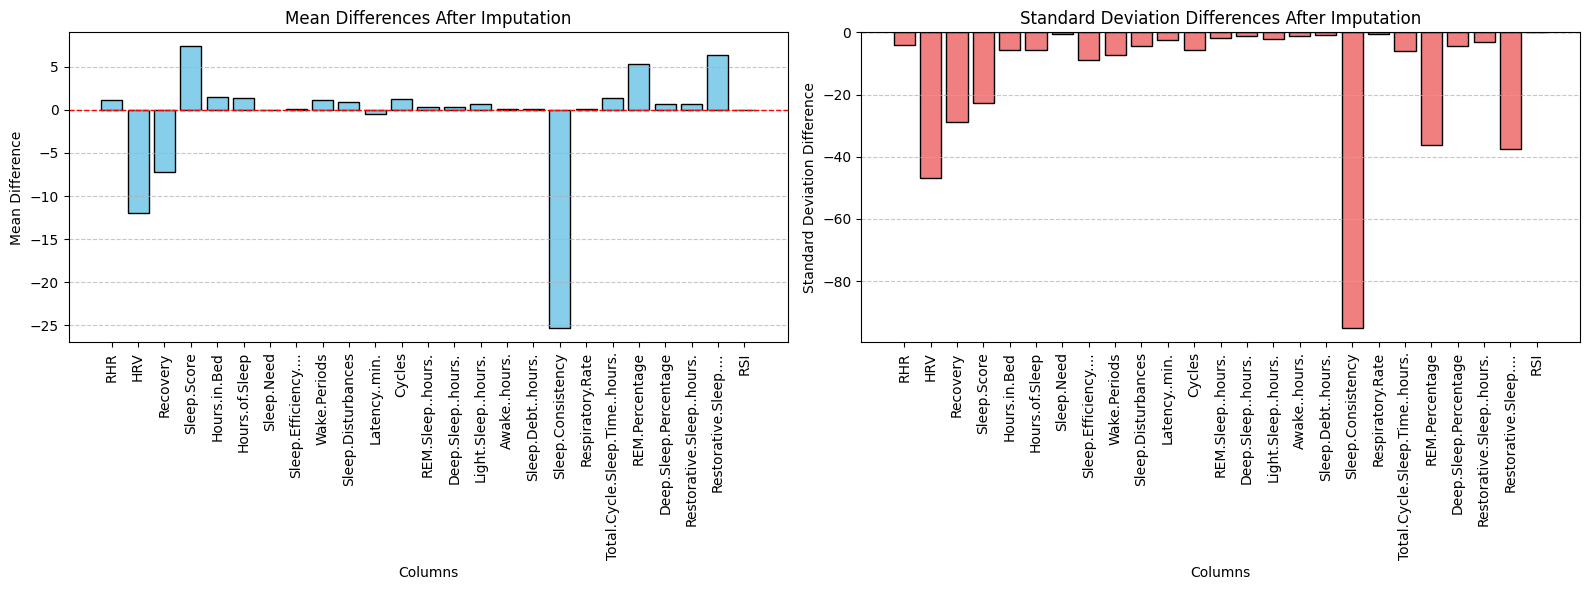

In [78]:
diff_df_T = diff_df.T
bar_width = 0.4
x = np.arange(len(diff_df_T))

fig, axes = plt.subplots(1, 2, figsize=(16, 6))  # 1 row, 2 columns

# Mean Difference Plot
axes[0].bar(diff_df.columns, diff_df.loc['mean_diff'], color='skyblue', edgecolor='black')
axes[0].axhline(0, color='red', linestyle='--', linewidth=1)   # Add a horizontal line at 0
axes[0].set_title("Mean Differences After Imputation")
axes[0].set_xlabel("Columns")
axes[0].set_ylabel("Mean Difference")
axes[0].tick_params(axis='x', rotation=90)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# Standard Deviation Difference Plot
axes[1].bar(diff_df.columns, diff_df.loc['std_diff'], color='lightcoral', edgecolor='black')
axes[1].axhline(0, color='red', linestyle='--', linewidth=1)
axes[1].set_title("Standard Deviation Differences After Imputation")
axes[1].set_xlabel("Columns")
axes[1].set_ylabel("Standard Deviation Difference")
axes[1].tick_params(axis='x', rotation=90)
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout
plt.tight_layout()
plt.show()